In [146]:
# 연습: reset_index() 와 melt() 로 롱폼 만들기

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


test = pd.read_csv('/Users/miji.lee/Desktop/ML Practice/titanic/test.csv')
train = pd.read_csv('/Users/miji.lee/Desktop/ML Practice/titanic/train.csv')

df_pc = train.copy()

df_pc_reset = df_pc.reset_index()
df_pc_reset = df_pc_reset.rename(columns = {'index': 'Survival'})
df_pc_reset.index.name =None
# reset_index(): melt하려면 기준으로 두는 칼럼이 인덱스여서는 안됨. 칼럼이어야 됨.
# 나는 survival 여부를 기준으로 롱폼 만들고 싶은데 df_pc상태에서는 그게 인덱스로 설정되있음
# 그래서 얘를 컬럼으로 빼서 사용될 수 있게 함.

In [147]:
df_pc_reset = df_pc_reset.melt(id_vars='Survival', var_name='PClass', value_name = 'Number')
df_pc_reset
# melt 는 옆으로 긴 데이터프레임을 아래로 길게 늘어뜨리는 것
# id vars: 어떤 칼럼을 그대로 두고 녹일것인가
# var name: 녹일 열 이름을 담을 컬럼 이름
# value_name: 값이 들어갈 컬럼 이름

,Survival,PClass,Number
0,0,PassengerId,1
1,1,PassengerId,2
2,2,PassengerId,3
3,3,PassengerId,4
4,4,PassengerId,5
...,...,...,...
10687,886,Embarked,S
10688,887,Embarked,S
10689,888,Embarked,S
10690,889,Embarked,C


In [148]:
#  numpy practice

import numpy as np

list1 = [1,2,3]

array1 = np.array(list1)
print(type(array1)) # 1차원. 바깥 []안에 []로 감싸진 것만 어레이로 인식되고, 행과 열을 가진 2차원 matrix로 인식되기 시작 
# 만약 안쪽 []없이 그냥 숫자만 있으면 그건 그냥 숫자 나열(벡터)로 인식되고, 행도 열도 아닌 그냥 1차원
# 2차원이면 (행 1,열 3) 이지만, 1차원이면 걍 (3,)으로 아예 행 자체가 성립이 안됨
# ,만 들어가면 무조건 1차원
print(array1.shape)


array2= np.array([[1,2,3], [4,5,6]])
# 바깥 [] 안의 []는 행 바꿔쓰기를 의미함. [1,2,3]
                                # [4,5,6] -> 행 2개 열 3개 (2,3) 
# 리스트 2개고 2차원
print(type(array2))
print(array2.shape)


array3 = np.array([[1,2,3]])
print(type(array3))
print(array3.shape)
# 처음 예제와 달리 안쪽 []로 한번 더 감싸짐 -> 비로소 행렬로 인식됨.
# [1,2,3] 같이 행 1줄이고 열 3개인 2차원 매트릭스

<class 'numpy.ndarray'>
(3,)
<class 'numpy.ndarray'>
(2, 3)
<class 'numpy.ndarray'>
(1, 3)


In [149]:
# 데이터 타입 통일

# 원래 array안의 데이터 타입은 무조건 동일해야. [1, 2.3] 이런거 안됨
# 하지만 들어가기 위해 어레이가 자동으로 형변환시켜줌 -> [1.0, 2.3] 처럼
array1 = np.array([1,2, 'test'])
print(array1) # test가 문자열이니 통일시키려고 1,2도 문자열로 변경됨
array1.dtype

['1' '2' 'test']


dtype('<U21')

In [150]:
# astype

array_int = np.array([1,2,3])
array_int.astype('float64')

array([1., 2., 3.])

In [151]:
# axis 구분

# 행 방향부터 가장 큰 axis를 부여하고, 역방향으로 내려옴
# [1,2,3] 같이 벡터인 1차원 배열은 애초에 행은 1로 고정이고 열밖에 없으니 axis = 0은 가로방향
# [[1,2,3]
#   [4,5,6]] 같이 2차원 배열은 axis가 0,1밖에 없음. 그 중 axis = 1이 크니, 이것은 가로 방향에 배정되고 세로 방향은 남은 axis = 0\


In [152]:
# numpy 편하게 생성하기 
# 만들어지는 데이터의 쉐입은 아는데 값은 몰라서 프레임만 필요할 때
array_row =np.arange(10) # 순서대로 연속값 
                        # 10개의 원소. 0칼럼부터 9칼럼까지
print(array_row)
array_row.shape  # 1차원

zero_array = np.zeros([3,2], dtype = 'int32')
print(zero_array)

ones_array = np.ones([3,2], dtype = 'int32')
print(ones_array)

[0 1 2 3 4 5 6 7 8 9]
[[0 0]
 [0 0]
 [0 0]]
[[1 1]
 [1 1]
 [1 1]]


In [153]:
# ndarray의 차원 , 모양 변경

print(array_row) # 원본: 10개 원소, 1차원
array_row.reshape(5,2) # 2차원 5행 2열로 바꿔줘
array_row.reshape(-1,5) # -1는 가변적. 알아서 행 갯수가 열갯수 5개에 맞게 바꿔달라. 
# 원소가 10개인데 reshape(2,7) 같이 안맞는 갯수로 요청하면 에러


# 1차원으로 바꾸려면 
array2 = np.array([[1,2,3], [4,5,6]])
array2.reshape(-1,) 
#  

[0 1 2 3 4 5 6 7 8 9]


array([1, 2, 3, 4, 5, 6])

In [154]:
# 단일 indexing

# 1차원

array1 = np.arange(start =1, stop = 10)
print(array1)
print(array1[0]) # array 다음 []은 인덱싱 위치 빼달라는 의미 

print(array1[-1]) # 맨 뒷값
print(array1[-2]) # 맨 뒷값에서 다시 뒤로


# 2차원

array2 = array1.reshape([3,3])
print(array2)
print(array2[0,1]) # 0행 1열

[1 2 3 4 5 6 7 8 9]
1
9
8
[[1 2 3]
 [4 5 6]
 [7 8 9]]
2


In [155]:
# 슬라이싱 인덱싱 - 연속 인덱싱

# 1차원

print(array1)
array1[0:3] # 0,1,2 인덱스. 마지막은 포함 안함
array1.shape # 여전히 1차원

array1[3:]
array1[:]

# 2차원

print(array2)
array2[0:1,0:2]
array2[:,:]
array2[:2, 1:] # 마지막 숫자 2는 해당되지 않는걸 잊지말라구
array2[:1, 0]

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([1])

In [156]:
# 불연속 인덱싱

array2[[0,1],2]
array2[[0,1],:1]
array2[[0,1]] # 따로 열값 기재 안됐으면 전체

array1[array1>2] # 조건만 넣는 것도 가능

array([3, 4, 5, 6, 7, 8, 9])

In [157]:
# 순서 정렬

# 1차원

array1 = np.array([3,1,9,5])
np.sort(array1)
print(array1) # np.sort 는 원본 순서가 바뀌지 않음. 
array_new = np.sort(array1)

array1.sort()
print(array1) # ndarray.sort 역시 정렬은 동일하나, 원본 자체를 바꿈


# 내림차순 정렬

array2 = np.array([3,1,9,5])
np.sort(array2)[::-1]

[3 1 9 5]
[1 3 5 9]


array([9, 5, 3, 1])

In [158]:
# 순서 정렬 2차원

array2 = np.array([[8,12], [7,1]])

np.sort(array2, axis= 1) # 2차원에서 큰 값인 axis=1부터, row방향부터 시작함
np.sort(array2, axis = 0) 

array([[ 7,  1],
       [ 8, 12]])

In [159]:
# 원본의 인덱스 그대로 순서 정렬 시켜서 반환 

# 오름차순
array1 = np.array([3,1,9,5])
np.argsort(array1)

# 내림차순
np.argsort(array1)[::-1]

# 쓰임새
# key, value로 매핑을 해야 할 때

name_array = np.array(['A', 'B', 'C', 'D', 'E'])
score_array = np.array([78,95,84,98,88])
# 성적 좋은 순으로 사람명 매핑하고 싶은데 그냥 sort하면 순서가 다 틀어짐
sort_score = np.argsort(score_array) # 성적 좋은 순으로 인덱스
name_array[sort_score] # 어레이[숫자] 면 인덱싱 되는 것에 착안해서


array(['A', 'C', 'E', 'B', 'D'], dtype='<U1')

### 판다스

데이터 프레임은 열, 행 둘 다 있는 2차원 데이터셋
시리즈는 열 존재 안하고 행만 있는 1차원. 열 존재하면 2차원 데이터 프레임이 됨.
넘파이의 1차원은 열도 행도 존재 안함.

In [160]:
train['Pclass'].value_counts()
# pclass가 null 처리된 줄은 세지 않는 것이 문제
# 만약 전체의 70%가 NaN일 경우는 잘못 판단할수도 있음 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [161]:
# convert DataFrame to numpy

dict= {'col1':[1,11], 'col2':[2,22], 'col3':[3,33]}
df_dict = pd.DataFrame(dict)

df_array = df_dict.values
type(df_array)

# numpy to list

df_array.tolist()

[[1, 2, 3], [11, 22, 33]]

In [162]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
# 새 컬럼 생성, 수정

train['practice'] = train['Age']+100
train.head()

# 칼럼 삭제

train_drop = train.drop('practice', axis = 1) # 보통 칼럼을 삭제하므로 axis = 1이 흔함
                                            # row 삭제한다면 액시스 0
                                        # 디폴트가 inplace = False
train_drop.head()

# 여러 칼럼 동시에 삭제

train_drop.drop(['Age', 'Parch'], axis = 1, inplace = True) # axis 명시 안하면 오류
print(train_drop.head())


# 행 삭제

train_drop.drop([0,1,2], axis = 0, inplace = True)
print(train_drop.head()) # 3,4,5부터 시작함

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  \
0                            Braund, Mr. Owen Harris    male      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1   
2                             Heikkinen, Miss. Laina  female      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1   
4                           Allen, Mr. William Henry    male      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
   PassengerId  Survived  Pclass  \
3            4         1       1   
4       

In [ ]:
# lambda 

lambda_def = lambda x: x**2
lambda_def(3)

# 괄호 안의 숫자가 x 수행식으로 들어가고 리턴됨


# 입력값이 여러개일 경우 map함수

a = [1,2,3]
results = map(lambda x:x**2, a)

list(results)

# map(lambda x: x**2, a) → 계산 준비만 된 상태 (iterator, lazy evaluation)
# 실제로 x**2 계산은 아직 안 일어남. 순회할 때(for나 list() 등) 계산이 수행됨
# list(map(lambda x: x**2, a)) → iterator를 한 번 순회하면서 모든 계산 완료 후 리스트에 담음
# 즉, list()로 감싸는 순간 map 안의 람다 함수가 모든 원소에 적용되고 결과가 리스트에 저장되는 거야.
# for랑 다름

[1, 4, 9]

In [165]:
# 판다스 컬럼 : apply + lambda

# 한 컬럼에 일률적으로 계산해서 새로운 컬럼 만들 때

train['name_length'] = train['Name'].apply(lambda x: len(x))
train[['Name','name_length']].head()

# 열 하나 잡고 행 따라 내려가는 것이 디폴트 -> axis 별도 설정 안함


# 조건문으로 기존 칼럼 조작하려면

def child_age (x):    
    if x <10 : 
        return 'under 10'
    elif x <30: 
        return 'under 30'
    elif x<50: 
        return 'under 50'
    else: 
        return 'rest'

train['age_cat']= train['Age'].apply(lambda x: child_age(x))
train[['Age', 'age_cat']].head()

,Age,age_cat
0,22.0,under 30
1,38.0,under 50
2,26.0,under 30
3,35.0,under 50
4,35.0,under 50


In [166]:
# index

indexes = train.index
print(indexes) # 인덱스 객체일 뿐
print(indexes.values) # 객체를 실체적 숫자인 넘파이로 변환

RangeIndex(start=0, stop=891, step=1)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

In [167]:

train.reset_index() # 시리즈 형태를 데이터프레임으로 바꾸기 위해
# 기존 인덱스가 칼럼으로 만들어지고, 새로운 index가 만들어짐

value_counts= train['Pclass'].value_counts()
print(value_counts)
train['Pclass'].value_counts().index
# 원래 인덱스가 3,1,2였음 

train_new_index = value_counts.reset_index(drop= False, inplace = False) 
# 3,1,2가 df 안으로 들어오고 새로 0,1,2 인덱스 생성 
print(train_new_index)

# value_counts를 리셋 인덱스

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
   Pclass  count
0       3    491
1       1    216
2       2    184


In [168]:
# value_counts를 테이블로 만들 때 reset index 마니 씀

new_train = train['Pclass'].value_counts().reset_index()

new_train.rename(columns = {'count': 'Number'}) # dict형태

,Pclass,Number
0,3,491
1,1,216
2,2,184


In [ ]:
# 필터링

# train[['Name', 'Age']]
# train[0:2]

data = {'Name': ['A', 'B', 'C'], 
        'Year': [10,11,12],
        'Gender': ['M', 'F', 'M']}
df = pd.DataFrame(data, index = ['one', 'two', 'three'])
print(df)


df.iloc[0:1, 0] # iloc는 위치 인덱스이므로 숫자만 들어감 
# df.iloc['one', 1] 에러남

df.iloc[:, -1] # 맨 마지막 컬럼 데이터만 가져와 - 보통 target(답지)가 맨 마지막 칼럼에 있으므로 그거 빼놓고 나눌 때 사용
df.iloc[:, :-1] # 맨 마지막 컬럼만 빼고

      Name  Year Gender
one      A    10      M
two      B    11      F
three    C    12      M


,Name,Year
one,A,10
two,B,11
three,C,12


In [170]:
# loc

df.loc['one':'three', 'Name'] # 칼럼 기반이므로 칼럼명 적어.
                                # loc에 조건문 적을 수 있음 -> 논리적인 것 사용 가능

# boolean을 더 많이 사용

train[train['Age']>60][['Name', 'Pclass']].head()
train[ (train['Age']>60) & (train['Pclass']==1) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,practice,name_length,age_cat
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,165.0,30,rest
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,171.0,25,rest
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,161.0,25,rest
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,162.0,25,rest
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,163.0,33,rest
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,164.0,17,rest
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S,165.0,25,rest
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,171.0,23,rest
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S,164.0,28,rest
555,556,0,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S,162.0,18,rest


In [171]:
# sort values

train.sort_values(by = ['Name', 'Pclass'], ascending= True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,practice,name_length,age_cat
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,142.0,19,under 50
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,116.0,27,under 30
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,135.0,32,under 50
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C,130.0,19,under 50
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C,128.0,37,under 30


In [172]:
# group by

train.groupby('Pclass')[['Age', 'Fare']].mean()
train.groupby('Pclass')['Age'].agg(['max', 'min'])
# Pclass 별 age와 sex의 갯수 (distinct는 아님)


# 칼럼마다 다른 집계 방식을 쓰고 싶을 때

train.groupby('Pclass').agg({'Age': 'min', 
                             'Sex': 'count'})


# 한 칼럼에 여러가지 집계 방식을 쓰고 싶을 때 (named group by)

# train.groupby('Pclass').agg({'Age': 'min', 
                            #  'Age': 'count'}) 이렇게 쓰면 뒤에 있는 count만 계산됨
                            
train.groupby('Pclass').agg(age_min = ('Age','min'),
                             age_count = ('Age', 'count'))

# # 이것도 동일
train.groupby('Pclass').agg(
    age_min = pd.NamedAgg(column = 'Age', aggfunc = 'min'),
    age_count = pd.NamedAgg(column = 'Age', aggfunc = 'count')
)

,age_min,age_count
Pclass,,
1,0.92,186
2,0.67,173
3,0.42,355


In [173]:
# 결손 데이터 처리하기

train.isna().sum()

train['Cabin'] = train['Cabin'].fillna('NA') # 임의의 글자 할당
train['Age'] = train['Age'].fillna(train['Age'].mean()) # 평균 넣어줌

train[['Cabin', 'Age']].isna().sum()


# replace 로도 채울 수 있음

train['Age'].replace(np.nan, 'NA')
train['Age'].isna().sum()

np.int64(0)

In [174]:
train['Sex'] = train['Sex'].replace({'male': 'Man', 'female': 'Woman'})
train['Sex'].value_counts()


# train['Name'].nunique() # 몇건의 고유값이 있는가
# value_counts와 다름. 그건 이름별로 몇명인가 (당연히 1명씩)


Sex
Man      577
Woman    314
Name: count, dtype: int64

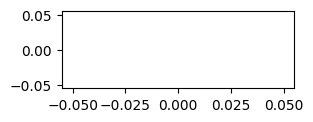

In [175]:
# Matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize = (3,1)) # 전체 캔버스, 액자 느낌
                            # 주로 크기 변경에 사용

ax = plt.axes() # 그림을 그리는 부분 - 이걸 종이 1이라 하자
ax.plot() # 그림을 그리는 특정 종이 1에 그리기 시작. 


# plt.plot() 는 특정 종이 1이 아니라 라이브러리 자체에 지금 활성화된 종이에 그린다.
            # 아직 액자, 종이 안만들었으면 이참에 그냥 만들어줌
            
plt.show() # 현재 활성 figure 전체를 화면에 펼쳐낸다.
            # plt.plot() 만으로는 그리기만 할뿐 화면에 안보여줌.

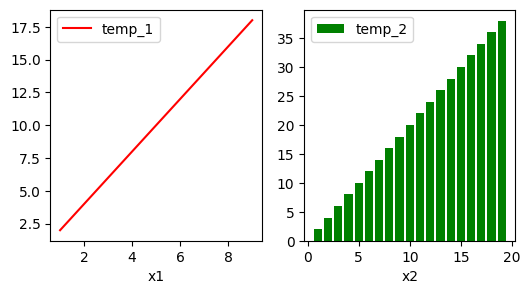

In [176]:
# 한 figure 캔버스에 여러 그래프 배치할 때 plt.subplots()
x1 = np.arange(1,10)
x2 = np.arange(1,20)
y1 = 2* x1
y2 = 2* x2

fig, ax = plt.subplots(nrows =1, ncols = 2, figsize = (6,3)) # plt.subplots()는 항상 figure, axes 총 2개 반환

ax[0].plot(x1, y1, color = 'red', label = 'temp_1')
ax[1].bar(x2,y2, color = 'green', label = 'temp_2')

ax[0].set_xlabel('x1')
ax[1].set_xlabel('x2')

ax[0].legend()
ax[1].legend()

plt.show()


# 행2 * 열2 이상 배열일때는 ax[0][0], ax[0][1], ax[1][0], ax[1][1]

/var/folders/fp/y1lmwb456hg9tbbtf_dysryc0000gp/T/ipykernel_95315/2403841984.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/var/folders/fp/y1lmwb456hg9tbbtf_dysryc0000gp/T/ipykernel_95315/2403841984.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


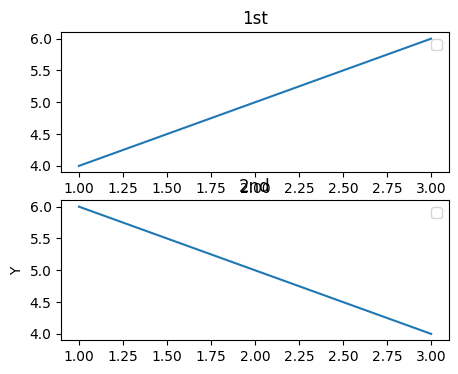

In [177]:
# ax 이렇게도 쓸 수 있음.

fig, (ax1, ax2) = plt.subplots (nrows = 2,ncols = 1, figsize = (5,4))

ax1.plot([1,2,3], [4,5,6])
ax1.set_title("1st")
ax1.set_xlabel('X')
ax1.legend()

ax2.plot([1,2,3],[6,5,4])
ax2.set_title("2nd")
ax2.set_ylabel('Y')
ax2.legend()

plt.show();

NameError: name 'x' is not defined

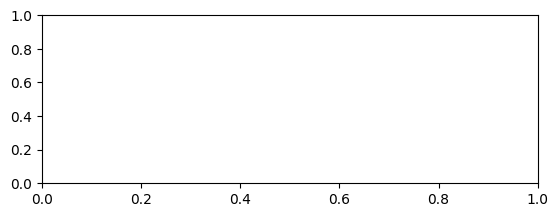

In [178]:
# 만약 plt.subplot()을 쓴다면:

plt.subplot(2,1,1)    # plt.plot과 마찬가지로 그린 김에 figure 까지 그냥 만들어줌. 위치 확인용
plt.plot(x,y1)        # 그래도 plot 위에 그리긴 해야함

plt.subplot(2,1,2) 
plt.plot(x,y2)

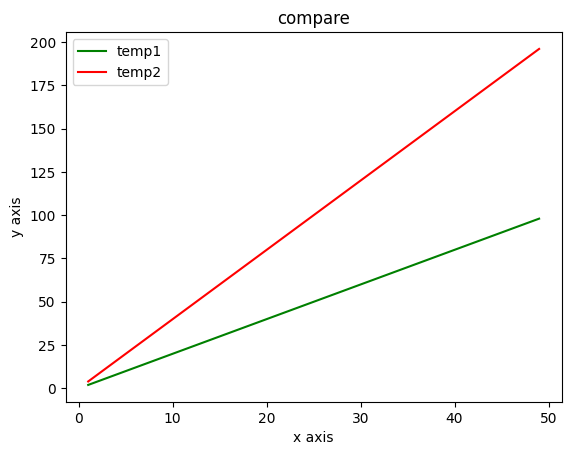

In [179]:
# 한 axes 위에 여러 그래프 배치할 때

x1 = np.arange(1,50)
y1 = x1*2
y2 = x1*4

plt.plot(x1,y1, color = 'green', label = 'temp1') # 현재 axes를 자동으로 생성
plt.plot(x1, y2, color = 'red', label = 'temp2') # 위에서 생성된 액시스를 자동으로 찾음

plt.xlabel('x axis')
plt.ylabel('y axis')

plt.title('compare')
plt.legend()
plt.show()

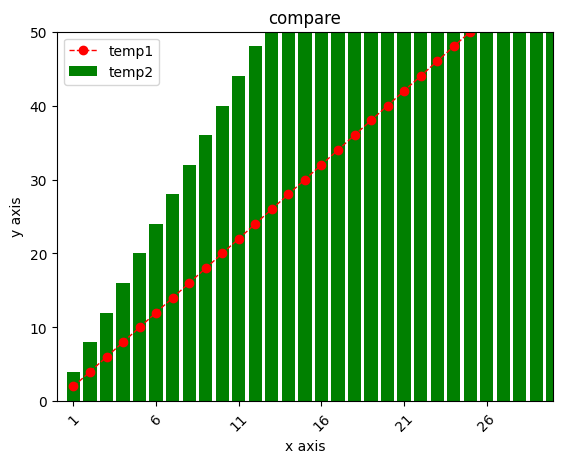

In [180]:
# 바 버전 

plt.plot(x1,y1, color = 'red', marker = 'o', linestyle = 'dashed', linewidth = 1, markersize = 6, label = 'temp1')  
plt.bar(x1, y2, color = 'green', label = 'temp2') 

plt.xlabel('x axis')
plt.ylabel('y axis')

plt.xticks(ticks = np.arange(1,50,5), rotation = 45) # x 값 빽빽할 때 회전

plt.xlim(0,30)
plt.ylim(0,50)

plt.title('compare')
plt.legend()
plt.show()

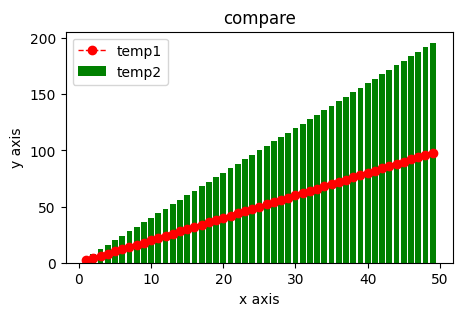

In [181]:
# 위와 동일한걸 axes 객체 따로 만들고 싶다면 (plt.plot 안쓰고)

plt.figure(figsize = (5,3))
ax = plt.axes()

ax.plot(x1,y1, color = 'red', marker = 'o', linestyle = 'dashed', linewidth = 1, markersize = 6, label = 'temp1')  
ax.bar(x1, y2, color = 'green', label = 'temp2') 

ax.set_xlabel('x axis') # ax 객체에 label 추가하려면 set_ 붙임
ax.set_ylabel('y axis')

ax.set_title('compare') # 타이틀에도 set_
ax.legend() # legend만 예외적으로 set_안붙임
plt.show() # 캔버스를 펼치는거니까 plt


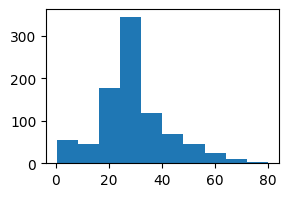

In [182]:
# histogram

plt.figure(figsize = (3,2))
plt.hist(train['Age'])
plt.show()

# train['Age'].hist() 도 가능


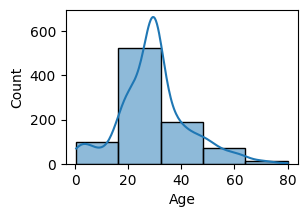

In [183]:
import seaborn as sns

plt.figure(figsize = (3,2)) # seaborn에서도 크기는 figure로 조정
sns.histplot(x = 'Age', data = train, bins = 5, kde = True)

plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

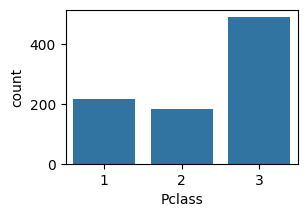

In [184]:
# 갯수 세기

plt.figure(figsize = (3,2))
sns.countplot(x = 'Pclass', data = train)

# x 축은 카테고리형 데이터 (연속형이면 삐죽삐죽 할거임)

/var/folders/fp/y1lmwb456hg9tbbtf_dysryc0000gp/T/ipykernel_95315/2898052751.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'Pclass', y = 'Survived', data = train,  ci = False)
/var/folders/fp/y1lmwb456hg9tbbtf_dysryc0000gp/T/ipykernel_95315/2898052751.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'Pclass', y = 'Survived', data = train,  ci = False, estimator = sum)


<Axes: xlabel='Pclass', ylabel='Age'>

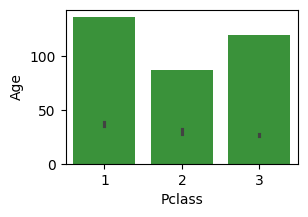

In [185]:
# 평균/ 총합

plt.figure(figsize = (3,2))
sns.barplot(x = 'Pclass', y = 'Age', data = train)
# x축은 카테고리형, y는 연속형

# y가 Survived같은 카테고리형 이더라도 1,0이니까 평균 내서 생존율을 구해볼수는 있음
# 어쨌든 y는 무조건 숫자

sns.barplot(x = 'Pclass', y = 'Survived', data = train,  ci = False)


# 기본 연산이 평균값이지만 합계로 바꾸려면
sns.barplot(x = 'Pclass', y = 'Survived', data = train,  ci = False, estimator = sum)

<Axes: xlabel='Pclass', ylabel='Sex'>

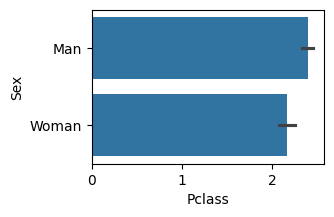

In [186]:
# 만약 y 숫자가 아니라면

plt.figure(figsize = (3,2))
sns.barplot(x = 'Pclass', y = 'Sex', data = train)

# 맘대로 가로세로 뒤집어서 이거 의미한거 아니냐고 바꿈

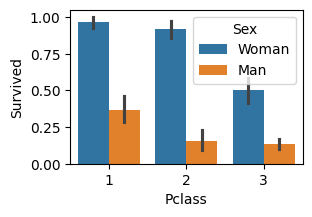

In [187]:
# 작은 granularity로 더 깊게 break down하려면 hue

plt.figure(figsize = (3,2))
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train);

<Axes: xlabel='Age_cat', ylabel='Survived'>

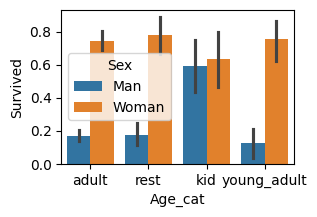

In [188]:
# 만약 연속형 (x축) 별로 숫자를 보고싶다면
# 연속형 값을 카테고리형으로 바꾼 뒤 x축에 넣는다

def age_cat (age):
    if age <10:
        return 'kid'
    elif age <20:
        return 'young_adult'
    elif age <40:
        return 'adult'
    else: 
        return 'rest'
    
train['Age_cat'] = train['Age'].apply(lambda x: age_cat(x))

plt.figure(figsize = (3,2))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = train)

<Axes: xlabel='Age_cat', ylabel='Survived'>

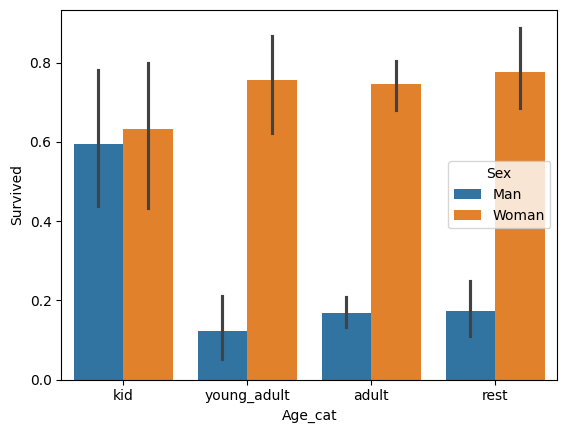

In [189]:
# x축 순서 정렬하려면

order_cols = ['kid', 'young_adult', 'adult', 'rest']
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = train, order= order_cols)

<Axes: xlabel='Pclass', ylabel='Age'>

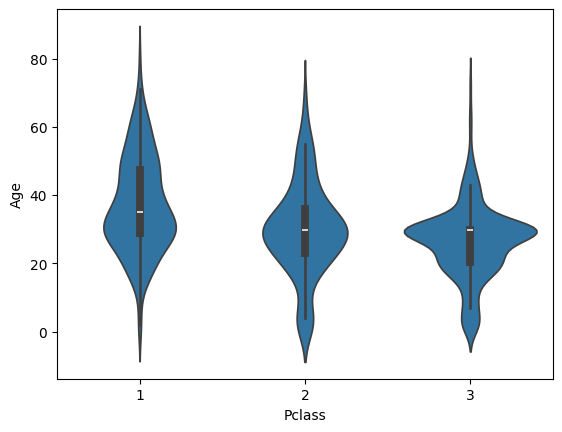

In [190]:
# 연속값의 분포도 (히스토그램과 비슷)

sns.violinplot(x = 'Pclass', y = 'Age', data = train)

# 가운데 검정 박스는 25,50,75%

# 히스토그램과 달리 x축 카테고리 별로 분포를 비교할 때

<Axes: xlabel='Pclass', ylabel='Age'>

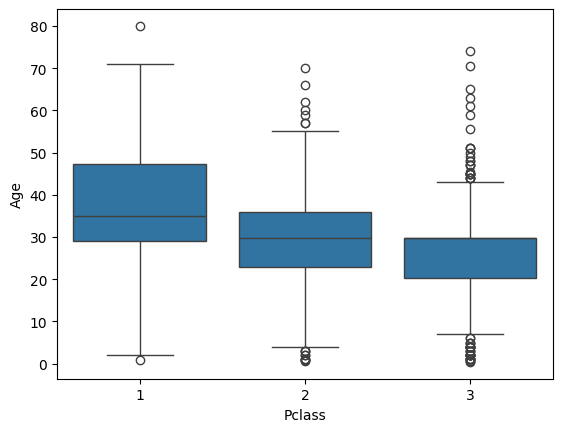

In [191]:
sns.boxplot(y = 'Age', x = 'Pclass', data = train)

# 바이올린 플랏의 검정 박스만 뽑은 것

/var/folders/fp/y1lmwb456hg9tbbtf_dysryc0000gp/T/ipykernel_95315/2745636510.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[index].set_xticklabels(axs[index].get_xticklabels(),rotation = 90)


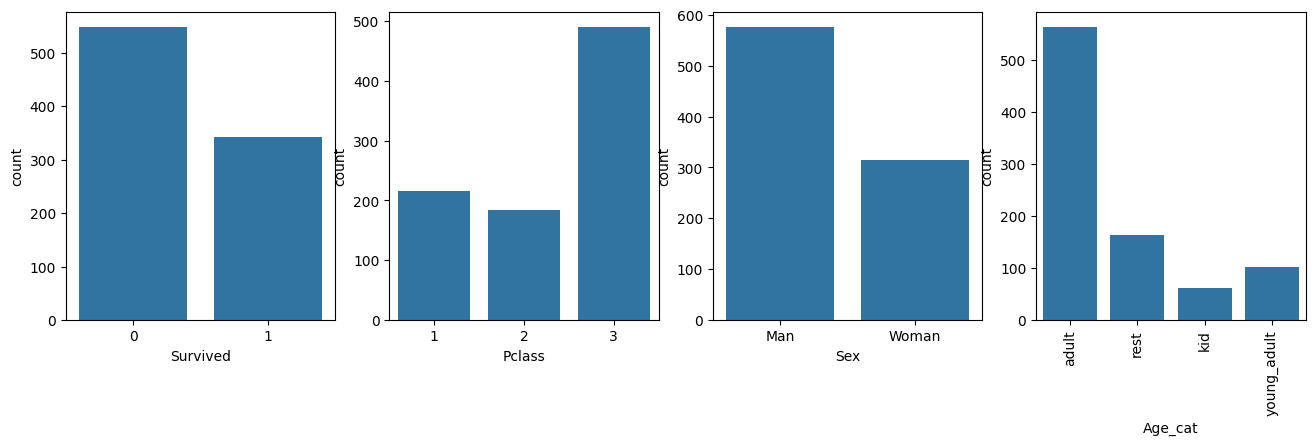

In [ ]:
# subplots 으로 '복수'의 카테고리성 칼럼 시각화
cols = ['Survived', 'Pclass', 'Sex', 'Age_cat']

fig, axs = plt.subplots(nrows = 1, ncols = len(cols), figsize = (16,4))

for index, column in enumerate(cols): # index, column이 동시에 필요하니 enumerate
    sns.countplot(x = column, data = train, ax = axs[index]) # countplot의 인자 중 하나가 위치 설정하는 ax
    if index ==3:
        axs[index].set_xticklabels(axs[index].get_xticklabels(),rotation = 90)
        # 만약 x레이블을 돌릴 필요가 없었으면 마지막줄도 필요 없었을 것
        # 원래는 plt.xticks(rotation = 90)으로 되지만, 
        # axs객체에 직접 xticks를 써야할 경우 set_xticklabels 으로 적용
                

/var/folders/fp/y1lmwb456hg9tbbtf_dysryc0000gp/T/ipykernel_95315/2271063631.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[index].set_xticklabels(axs[index].get_xticklabels(),rotation = 90)


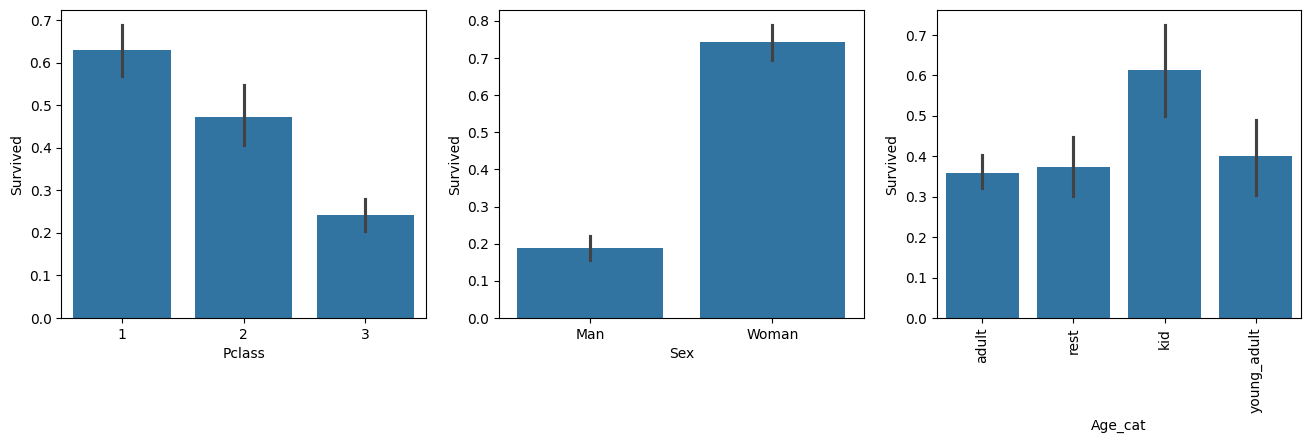

In [195]:
# subplots 으로 '복수'의 카테고리성 칼럼에 따른 생존율 시각화

cols = ['Pclass', 'Sex', 'Age_cat']

fig, axs = plt.subplots(nrows = 1, ncols = len(cols), figsize = (16,4))

for index, column in enumerate(cols):
    sns.barplot(x=column, y = 'Survived', data = train, ax = axs[index])
    if index ==2:
        axs[index].set_xticklabels(axs[index].get_xticklabels(),rotation = 90)



In [ ]:
a=(train['Survived']==1)
type(a)


In [ ]:
[train['Survived']==1]

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [ ]:
# subplots 으로 '복수'의 연속성 칼럼에 따른 생존율 시각화

# 왼쪽에는 바이올린 플랏
# 오른쪽은 생존, 죽음 히스토그램을 하나에 담음

# 바이올린 플랏을 보충해주기 좋은 겹쳐진 히스토그램

survived = train[train['Survived']==1] 
dead = train[train['Survived']==0]

def func (columns):
    for column in columns:
        fig, axs = plt.subplots(nrows =1, ncols = 2, figsize= (12,4))
        
        sns.violinplot(x= 'Survived', y= column, data = train, ax = axs[0]) # 왼쪽
        
        sns.histplot(survived[column], ax = axs[1], label = 'Survived', color = 'blue') #오른쪽 1
                                                                                            # 갯수가 적기 때문에 겹쳐볼때는 사망건과 뾰족함을 비교하는 용도로 씀
        sns.histplot(dead[column], ax = axs[1], label = 'Dead', color = 'red') #오른쪽 2
        
        axs[1].legend()
    
    
columns_list = ['Age', 'Fare', 'SibSp', 'Parch']
func(columns_list)


<Axes: xlabel='Age', ylabel='Fare'>

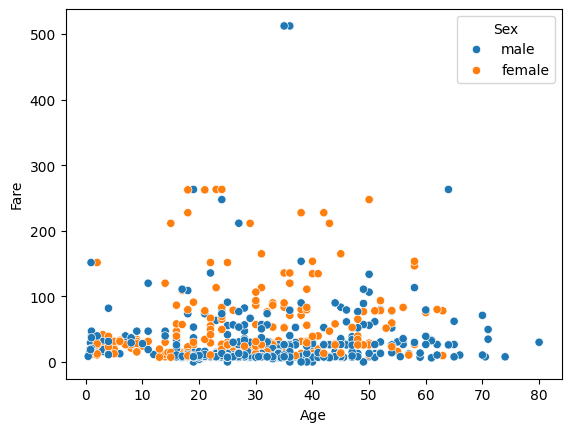

In [ ]:
# 산포도

sns.scatterplot(x = 'Age', y = 'Fare', hue ='Sex',  data = train)

# x,y 축 모두 연속형
# outlier 파악에 용이

<Axes: >

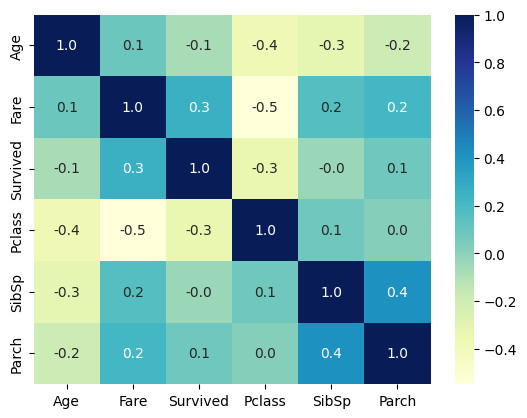

In [ ]:
# 히트맵 - 숫자값의 상관도

train_df =  train[ ['Age', 'Fare','Survived', 'Pclass', 'SibSp', 'Parch']]
train_corr = train_df.corr()
train_corr

# 연속형이 가장 좋음. 
# 분류보다 회귀 모델에서 유용
# 카테고리성 (pclass, SibSp...) 해석을 못할건 아니지만 최고는 아님

sns.heatmap(train_corr, annot=True, fmt = '.1f', cbar=True, cmap = 'YlGnBu')

In [ ]:
print(divmod(10,3)) # 몫과 나머지. 몫은 // 나머지는 %
print(float(True)) # boolean이라도 숫자로 인식
print(str(1.0)) # 숫자를 문자열로 형변환
print(pow(5,3), 5**3)

str1 = """"Hello World"""
str2 = ''''Hello!'''
print(len(str2))
print('e' in str2) # string은 리스트와 같고, 리스트는 시퀀스임. (알파벳 순서가 있고 반복 가능)
                    # 버스 정류장에 줄 서있는 사람들처럼 하나하나가 순서가 있다
                    # 시퀀스는 in 연산자 사용 가능.
print('z' not in str1)                    
print(sorted(str1)) # 리스트 형태로 정렬
print(str2.split()) # 분리

# 빈 문자열 생성
str1_t1 = ''
str2_t2 = str()
print(type(str2_t2), len(str2_t2))

(3, 1)
1.0
1.0
125 125
7
True
True
[' ', '"', 'H', 'W', 'd', 'e', 'l', 'l', 'l', 'o', 'o', 'r']
["'Hello!"]
<class 'str'> 0


In [ ]:
im_str = 'Good' # 문자열은 알파벳들의 시퀀스라서 각 알파벳으로 자르는 처리 (슬라이싱) 가능. 

reversed(im_str)

for i in im_str:
    print(i)
    
print(im_str[0:1])

list(im_str) # 시퀀스라서 한글자씩 분해해서 리스트 형태로도 만듦

print(list(reversed(im_str)))

G
o
o
d
G


['G', 'o', 'o', 'd']

In [ ]:
a = [10,100,1000]

a[1] = 3 # 리스트 수정
print(a)

[10, 3, 1000]


In [ ]:
# 슬라이싱 

str_sl = 'Nice Python'
print(str_sl[:6])
print(str_sl[3:]) # : 이전, 이후 비워둔 방향으로 전부 가져옴
print(str_sl[:len(str_sl)])

print(str_sl[1:9:2]) # 1부터 8번까지. 2칸 단위로 점프
print(str_sl[-5:]) # 앞에서는 0부터 센다면, 뒤에서는 -1,-2로 센다. 
                    # -5인 y에서 끝까지
print(str_sl[1:-2]) #-2의 -1인 -3까지.
print(str_sl[::2]) # 처음 생략 (처음부터 가져와)+뒤 생략 (뒤까지 가져와)+ 처음부터 2칸씩 간격 점프
print(str_sl[::-1]) # 모든 범위 + 뒤부터 뒤 한칸씩

G
o
o
d
 
d
a
y
Nice P
e Python
Nice Python
iePt
ython
ice Pyth
Nc yhn
nohtyP eciN


In [ ]:
# 딕셔너리 순서 x, key 중복 x. 수정삭제 가능

a_dict = dict()
a = {'name': 'a', 'number':[1,2,3,4]}
b = dict(
    name = 'b', 
    number = [5,6],
    city = 'Seoul'
    )

# 효율적인 자료 구조. 학생 여러명의 정보를 정리해서 한 리스트에 보관 가능 group = [a,b,...]

a['name'] # 접근할때 리스트처럼
a.get('name1') # a['name']은 만약 그런 키가 없으면 에러가 나지만 get으로 가져오면 none 나옴. 더 안정적. 키 이름 불확실할때 이걸 씀


a['address'] = 'seoul' # 키 수정하면 맨 뒤에 추가
a['name'] = 'aaa' # 같은 key 추가하면 기존것이 수정됨
a['rank'] = [1,2,3]

In [ ]:
a.keys() # key들만 가져옴
list(a.keys()) # 반복문에서 쓰기 좋게 dict_keys 없애고 리스트로 변환

a.values()

print(a.items()) # key, 밸류 동시에 튜플로 묶고 리스트로 묶은 dict_items 
print(list(a.items())) # dict_items 없애고 완전 리스트로 바꿈

dict_items([('name', 'aaa'), ('number', [1, 2, 3, 4]), ('address', 'seoul'), ('rank', [1, 2, 3])])
[('name', 'aaa'), ('number', [1, 2, 3, 4]), ('address', 'seoul'), ('rank', [1, 2, 3])]


In [ ]:
print(a.pop('name')) # name key의 밸류만 가져옴
                    # a 에는 name key만 사라져있음

print(a.popitem()) # 지정한 키 가져오는 pop과 달리 랜덤으로 꺼내옴
                  # 딕셔너리는 순서가 없으므로 뒤에서 빼오지않고 무작위로 꺼내옴.

aaa
('rank', [1, 2, 3])


In [ ]:
print('birth' in a)      # 특정key가 존재하는가
print('Seoul' in b.values())  # 특정 value가 존재하는가

a.update(name = 'miji') # 수정 시 a['name'] = 'aaa' 말고 함수로 할경우. 혹은 아래처럼

temp = {'name': 'AAA'}
a.update(temp)
a

{'name': 'AAA', 'number': [1, 2, 3, 4], 'address': 'seoul', 'rank': [1, 2, 3]}

In [ ]:
a_set = set()
a = set([1,2,3,4,4]) # 집합은 순서 상관없지만 중복 안됨
b = {1,2,(2,3,4),5} # 딕셔너리처럼 { }쓰지만 키는 없음

'a' in a

# 형번환 : 튜플/리스트로 변환하면 슬라이싱등 가능. 시퀀스 있음 = 순서가 있으니까
a1 = tuple(a)
a1[0]

b1 = list(a)
b1

# len도 가능
len(a)


{1, 2}

In [ ]:
# 중첩 조건문

grade = 'A'
total = 95

if grade =='A': # A가 충족 안되면 아예 고려도 안됨
    if total>90: # sql case when과 달리 then 안들어감
        print('full scholarship')
    elif total>80: 
        print('80_scholarship')
    else: # else 는 마지막에만 쓸 수 있음
        print('half scholarshiop')
else:
    print('none')
    
# else 는 필수가 아님.
# if age < 18:
#     print("minor")
# age ≥ 18일 때는 아무것도 안 해도 된다면 else 생략


full scholarship


In [ ]:
for v1 in range(10):
    print(v1)

0
1
2
3
4
5
6
7
8
9


In [ ]:
sum1 = 0

for v in range(1001):
    sum1 = sum1+v
    if v ==1000: 
        print(sum1)
# 혹은 for v in range(1,1001):
# sum(range(1,1001)) -> 1부터 1000까지 합
# sum(range(4,1001,4)) -> 1부터 1000까지 4배수의 합
 
sum2 = 0
    
for i in range(1,1001):
    sum2 += i
print(sum2)

500500
500500


In [ ]:

# 1005까지 4의 배수의 합 = 4+8+12...+1004

# 4*1, 4*2,... 같이 더하는 숫자를 만든다
# 이전 밸류에 +=로 더한다
# 더하는 수가 1005보다 작은지 if로 확인한다 
# 1000 이면 멈춘다

sum1 = 0

for i 
if 4*i<1005:
    sum1 = sum1+4i

In [ ]:
# iterable 자료형 반복 가능 (문자열 (word = 'beauty'), 리스트, 튜플, 집합, 딕셔너리)
# iterable 리턴 함수: range, reversed, enumerate, filter, map, zip

names = dict(name= 'Lee', age=33, city= "seoul")

for key in names:
    print(key) # key only
    print(names[key]) #  value only
    
# for i in names.values(): # 아예 values로 거른 뒤 iterate 시킬수도
#     print(i)

Lee
33
seoul


In [ ]:
# 모든 알파벳을 대문자로 출력하기
name = 'PineAPPle'
emp = [ ] # ''라고 선언해도 동일한가?

# 알파벳 하나씩 이터레이트 시키고
# if lower(alphabet)==True then upper(alphabet)
# else alphabet


for alp in name:
   if alp.islower() == True:
       emp.append(alp.upper())
   else:
       emp.append(alp)
print(''.join(emp))


PINEAPPLE


In [ ]:
# break : 검색할 그룹이 엄청 많은데 내가 원하는 값이 하나만 있는걸 알 때, 그 값 찾으면 굳이 나머지 다 안보고 끝내기

number = [12,3,45,55,1,65,5,14]

for n in number:
    if n== 1:
        print("Found")
        break 
 # num=12는 1이 아니니 아예 if 블럭 실행 자체가 안되고
#  그렇다고 아직 반복이 끝난건 아니기때문에 다음 값 3이 들어오고, 조건 맞을때만 끝남
#   break - break가 if, else와 동일 indent에 있으면 첫번째에서 12일때 끝나버림.
# n==1이 아니라 다음으로 넘어갔는데 그게 break였기때문
# 만약 else 블럭을 쓴다면 if블럭과 else블럭 사이는 붙어있어야 하므로 break가 같은 indent 취할 수 없음
    print(n)
        
# 조건 먼저 검사 -> 비었으면 (조건 만족하면) 종료 -> 아니면 작업 계속

12
3
45
55
Found


In [ ]:
# continue: 아무 흔적도 남기지 않고 스킵하고 싶은 값이 있을 때
# boolean, None, 결측값 등을 필터링할 때
# 루프 중간에서 아래 코드 실행을 막고 싶을 때

grp = ["1", 2,True, 4,3, complex(4)]

for g in grp:
    if type(g) is bool:
        continue
    print(type(g))          # continue/break가 있으면
                            # 조건 True → 루프 건너뜀/탈출
                            # 조건 False → 아래 코드 실행됨. 자연스럽게 “else처럼 동작”하게 되기 때문
                        # break,continue가 조건 충족 상황을 걸러주므로 else가 없어도 말이 되서 else는 안쓰기도 함. 
                    # 그럴거면 내어쓰기 해서 별도의 블록으로 만들어줌 

<class 'str'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'complex'>


In [31]:
# continue 가 while과 쓰이면

m =5
while m>0:
    m -=1
    if m ==2: # 2일때 break 되면 2는 아무 흔적 없이 다시 조건 m>0으로 돌아가서 m=1을 만듦.
        continue
    print(m)
print("loop end")

4
3
1
0
loop end


In [ ]:
# 유사: pass 
# 조건문/반복문 구조를 유지하기 위해서만 존재하는 "빈 문장"
# if문을 나중에 채우려고 할 때 (임시)

for g in grp:
    if type(g) is bool:
        pass
    print(type(g)) # boolean값은 그 블록에서는 아무것도 하지 않고 print로 내려감

<class 'str'>
<class 'int'>
<class 'bool'>
<class 'int'>
<class 'int'>
<class 'complex'>


In [ ]:
# for - else
# if 절을 실행하지 못했을 때 (=리스트 전부 봐도 45가 없을 때) if 블록에서 빠져나와 else 실행
# 루프가 정상 실행 되었는지 확인할 때

number = [12,3,45,55,1,65,5,14]

for num in number:
    if num == 45:
        print("Found")
        break
else:       # for와 같은 인덴트. if와 다른 인덴트임
    print("not exist") 
 

Found


In [ ]:
# 중첩 for 문 - 구구단

for x in range(2,5):
    for y in range(1,5):
        print (x*y) 
        # if 문과 헷갈리지 말것 1. for x 가 상위 반복문이어도 하위 조건문 for y와 같은 print(x*y)에서 동시에 동작 가능
        # x=2가 들어오면 y=1...5가 모두 완료할때까지 x=3으로 넘어가지 않음
    print('End')

2
4
6
8
End
3
6
9
12
End
4
8
12
16
End


In [ ]:
# while
# 조건이 만족하는 동안 계속 반복. 만족 안하게 될때 빠져나감

a = ['foo', 'bar', 'baz']

while a: # a에 값이 있음 = true 상태. 하나씩 pop으로 꺼내면 전부 없어지는 순간 false가 되니 멈춤
    print(a.pop())
print("---End---")    


# 5,4,3까지 역순으로 출력하기
n = 5
while n>0:
    n -= 1
    if n==2:
        break
    print(n)
print("loop end")

# while은 break를 종료 조건으로 함께 잘 쓰임

baz
bar
foo
---End---
4
3
loop end


In [ ]:
# while - else

# n=0이 되었을 때 더 이상 while n>0에 쓰일 수 없으므로 while 블럭 벗어나고 그 아래 블록 else 실행
# while과 else 가 동등한 인덴트에 있으니 가능. while이 else 지배 안함

n= 5
while n>0:
    n -= 1
    print(n)
else:
    print('else out') # 마지막에 한번 실행되어야 하는 액션

4
3
2
1
0
else out


In [41]:
# 리스트에서 특정 단어를 찾아보자

a = ['foo', 'bar', 'bar', 'qux']
s = 'kim'
i=0

while i < len(a):
    if a[i] == s:
        print('found')
        break
    i += 1
else:
    print('Not found')


Not found


In [ ]:
# while true:

a = ['foo', 'bar', 'bax', 'qux']

while True: # 값을 가져올 a가 트루 (=밸류가 존재하는) 한 -> a,pop()처럼 한번 돌때마다 줄여줘야 
    if not a: # a가 false 면 = a가 비었으면
        print('end of script')
        break
    print(a.pop())

qux
bax
bar
foo
end of script


In [ ]:
# 함수 종류 1. 매개변수 안필요

def function1():
    print('print')
    
function1() # 괄호 안하면 안나옴

# 2. 매개변수 (입력값) 필요

def function2(a,b):
    print(a,b)
    
function2(10,2) 

# 3. 리턴값 (결과) 안반환 - 내부적으로 처리만 해도 될 때

def function3(a,b):
    print(a,b)
    
function3(100,20) 

# 4. 리턴값 반환 - 결과값을 저장할 때

def function4(a,b):
    return a+b

r = function4(10,10) # 결과값으로 반환되는 a+b를 받을 변수 r 만듦
r

print
10 2
100 20


20

In [ ]:
# 다중 반환 

def func_mul(x):
    y1 = x*10
    y2 = x*20
    y3 = x*30
    return y1,y2,y3
     
value = 10 
a,b,c = func_mul(value) # 3개를 리턴하므로 받을때도 3개를 받아야
print(a)

100


In [74]:
# 다중 반환 - 다양한 데이터 타입

def func_mul(x):
    y1 = x*10
    y2 = x*20
    y3 = x*30
    # return (y1,y2,y3) # 튜플형
    return {'key1': y1, 'key2': y2, 'key3':y3 }  #딕셔너리형
    
    
value = 10
q = func_mul(value)
# print(list(q))
print(q.get('key1'), q.items(), q.keys(), q.values())

100 dict_items([('key1', 100), ('key2', 200), ('key3', 300)]) dict_keys(['key1', 'key2', 'key3']) dict_values([100, 200, 300])


In [ ]:
# *args() : arguments. 갯수가 가변인 인자 사용하는 unpacking
# 별 한개: 값 한 종류니까
# 튜플 형태로 넘김

def args_func(*args): # 몇개의 인자가 넘어와도 그 갯수만큼 *args에서 풀어서 다음 for구문의 args로 넘긴다
    for i, v in enumerate(args):
        print(format(i), v)
        
    
args_func('Lee', 'Park', 'Kim') # lee, park, kim이 한꺼번에 묶여서 *args로 보내짐
                                # lee,park,kim이 튜플 형태로 간주됨

0 Lee
1 Park
2 Kim


In [ ]:
# ** kwargs(): keywords arguments
# 별 두개: key, value 두 종류니까
# 딕셔너리용 언팩킹

def kwargs_func(**kwargs):
    for v in kwargs.keys():
        print(format(v), kwargs[v])
        
kwargs_func(name1 = 'Lee', name2 = 'Park', name3= 'Kim')

name1 Lee
name2 Park
name3 Kim


In [ ]:
# args + kwargs 혼합

def func(args_1, args_2, *args, **kwargs):
    print(args_1, args_2, args, kwargs)
    
func(10,20,30,'Lee', 'Kim', 'Park', name1 = 'Lee', name2 = 'Park', name3= 'Kim')
# args_1, args_2는 당연히 1개씩임
# **kwargs는 딕셔너리 전용이므로 key, value만 가짐
# 나머지 원소들은 갯수에 상관없이 한개의 *args에 할당


10 20 (30, 'Lee', 'Kim', 'Park') {'name1': 'Lee', 'name2': 'Park', 'name3': 'Kim'}


In [ ]:
def 

In [ ]:
# 중첩 함수

def nested_func(n):
    def func_in_func(i):
        print(i)
    print("in function")
    func_in_func(n+100)

nested_func(100)
# 100이 nested_func로 들어감 -> def 된거 정의만 하고 아래로 내려가 in function 프린트 -> 
# func_in_func 만나서 100+100=200을 위에서 정의한대로 200프린트

# 함수 안의 함수 func_in_func(1000) 밖에서 실행 불가

in function
200


In [ ]:
# lambda - def보다 효율적 메모리 사용. 일시적으로 그 자리에서 함수 필요할때

# 일반적 함수에서 변수 할당

def mult_func (x, y):
    return x * y

mult_func_new = mult_func # mult_func 이름이 있으므로 이 객체가 할당되서 실행됨
print(mult_func_new(10,20))


# 람다 함수에서 변수 할당

lambda_mult_func = lambda x,y : x * y
print(lambda_mult_func(10,20)) # 이름이 없으므로 객체 할당 안되고 즉시 실행
# 함수에 이름이 없음. 변수에 담아서 씀 (lambda_mult_func=)


200
200


In [ ]:
# lambda, def 를 섞을수도 있음

def func_final (a,b,func):
    print(a * b * func(10,10))
    
func_final(1,2,lambda x,y : x+y) # func_final 세번째 자리의 인자가 func라는 함수고, 람다로 func 즉시 정의됨
# 함수를 값처럼 전달한다. func_final은 기본 구조는 고정이지만 func를 바꿔 끼우면 확장성 넓어짐

40


In [ ]:
# class : 설계도. 클래스에서 객체를 만든다

# 부모 클래스
# 모든 유저가 공유하는 속성을 모아놓은 것. (모두 general 타입 & login 동작을 함)

class User:  
    def __init__(self, username, email): # 객체의 속성 정의. 
                            # 모든 객체마다 따로 갖는 변수 (=인스턴스 변수)
        self.name = username # 인스턴스 변수 1. self 붙이고 선언하는 변수. 개별 객체가 생성될 때 생기는 속성
        self.email = email # 인스턴스 변수 2
        
    user_type = 'General' # 모든 유저가 공유하는 속성 1 
                         # 공통 '속성'이니까 클래스 변수
    
    def change_privacy_policy (cls): # 유저 그룹 전체가 공유하는 속성 2 
        return cls.count # 공통 '동작'이니까 def. 전체 유저 정책 바꾸는 동작 주체가 클래스 자체이므로 클래스 메서드. 
                        # 동작 주체가 클래스 자체면 클래스 메서드, 개별 객체면 인스턴트 메서드
                        
    
    def login (self):  # 인스턴스 메소드. self를 인자로 받는 것들.
                       # 행동 주체가 개별 유저고, 사람마다 로그인 시간, 세션, 지속시간등이 다르므로 인스턴스
        print(self.username) # 로그인하는 행동 주체가 개별.
                    # 부모 클래스에도 인스턴트 메소드 생성 가능. 동작 주체는 개별이어도 모든 유저가 로그인하는 행동은 동일하므로
 
 
u1 = User('Lee' , 'abc@ccc.com') # 클래스라는 설계도에서 만들어진 객체 1
u2 = User('Kim' , 'abc@ddd.com') # 객체 2

print(User.user_type) 
print(u1.user_type) # user_typ은 부모 클래스 user로도, 인스턴스 u1으로도 접근 가능 -> user_type은 부모, 자식이 공유
print(u1.name) # 개별 인스턴스 속성 확인. self 붙었으니 공유가 아니라 별도 존재

General
General
Lee


In [ ]:
# 네임 스페이스: 객체를 인스턴스화 할 때 성질이 저장된 공간
# 클래스 (붕어빵 기계)에서 만들어진 결과물로 u1이 등록될 때 나열되는 성질

u1.__dict__ 

{'name': 'Lee', 'email': 'abc@ccc.com'}

In [ ]:
# 자식 클래스
# 부모 클래스의 특성 (상태, 동작)을 그대로 사용 & 변경해서 쓸 수 있음 => 상속

class PaidUser(User): # 부모 클래스인 User상속 받아서 적어줌
    def __init__(self, username, email, paid_until): # paid_until은 이 특정 자식에서만 필요한 데이터-> 전체 데이터 새로 정의
        super().__init__(username, email)
        self.paid_until = paid_until
    def extend_plan (self, days): # 특정 자식만 필요한 동작-> 자식 클래스에 추가
        print(days)
   
p = PaidUser()
p.login() # 자식 클래스 인스턴스가 부모 클래스의 동작 (login)을 사용할 수 있음
p.extend_plan()  # 자식에서 추가한 기능   

In [ ]:
# self

class Dog:
    def __init__(self, name): #__init__: 개별 인스턴스가 생성될떄마다 실행되는 함수
        self.name = name

    def func1(): # 클래스 메소드. 모든 강아지에 적용
        print('Dogs count')
        
    def func2(self): # 인스턴스 메소드. 개별 강아지에 적용
        print(f"{self.name} barking")
        
 
# 인스턴스 메소드 func2 부르려면 
f = Dog('Choco the Dog')  # f = Dog()는 인스턴스.
                        # __init__(name) 정의했으므로 Dog()안에 name 필수
      
Dog.func2(f) # 1. 인스턴스 f 를 넘겨주거나 (self (=func2 메소드 대상 객체) 명시해야. 특정 개 Choco한테 적용된다고)
f.func2() # 2. 인스턴드 f로 호출

Dog.func1() # 클래스 메소드 부르려면 


Choco the Dog barking
Choco the Dog barking
Dogs count


In [ ]:
class Warehouse:
    # 클래스 메소드
    stock_num = 0 # 재고
    
    def __init__(self, name):
        self.name = name # 인스턴스 변수
        Warehouse.stock_num += 1
    
    def __del__(self): # 객체 소멸시 호출
        Warehouse.stock_num -= 1
        
u1 = Warehouse('Kim')
u2 = Warehouse('Park')

print(u1.stock_num) # 두명 추가했으므로 2
print(Warehouse.__dict__) # 이 2명은 Warehouse에서 모두 공유하는 성질인 stock_num에서 찾아준 것

del u1
del u2

print(Warehouse.stock_num) # 삭제했으므로 0
print(Warehouse.__dict__) # warehouse에 나온 공통 stock_num = 0

2
{'__module__': '__main__', '__firstlineno__': 1, 'stock_num': 2, '__init__': <function Warehouse.__init__ at 0x10979d430>, '__del__': <function Warehouse.__del__ at 0x10979c720>, '__static_attributes__': ('name',), '__dict__': <attribute '__dict__' of 'Warehouse' objects>, '__weakref__': <attribute '__weakref__' of 'Warehouse' objects>, '__doc__': None}
0
{'__module__': '__main__', '__firstlineno__': 1, 'stock_num': 0, '__init__': <function Warehouse.__init__ at 0x10979d430>, '__del__': <function Warehouse.__del__ at 0x10979c720>, '__static_attributes__': ('name',), '__dict__': <attribute '__dict__' of 'Warehouse' objects>, '__weakref__': <attribute '__weakref__' of 'Warehouse' objects>, '__doc__': None}


In [ ]:
# import 통해서 어디서 가져오는것인지

import sys

print(sys.path)

['/Library/Frameworks/Python.framework/Versions/3.14/lib/python314.zip', '/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14', '/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/lib-dynload', '', '/Users/miji.lee/Desktop/ML Practice/.venv_new/lib/python3.14/site-packages']


In [ ]:
# 예외 처리 - 에러 종류


# SynaxError: 문법 오류
# print('error'))


# NameError: 참조 없음
# a=10
# b=15
# c = print(c) ; c is not defined


# ZeroDivisionError: 0으로 나눌 때
# print(100/0)


# IndexError: 존재하지 않는 인덱스 번호 - list index out of range
# for 문 사용시 & 빈 리스트에 x.pop() 할 때
# x= [1,2,3]
# print(x[5])


# KeyError: Dict에서 존재 안하는 key 호출
# get 메소드가 안전
# dic = {'name':'Lee', 'age':10}
# dic['hobby'] -> dic.get('hobby')


# AttributeError: 모듈, 클래스 내 잘못된 속성 사용
# import time
# print(time.time2) - time2 메소드 존재 안함


# ValueError: 자료구조 안에서 참조하려는 데이터 없을 때
# x=[1,2,3]
# x.remove(10)


# FileNotFoundError : 그 위치에 그런 파일 없을 때
# f= open('test.csv')


# TypeError: 자료형에 안맞는 연산 수행
# x =[1,2]
# y = (1,2)
# print(x+y) : 불변형과 가변형 자료 incompatible

In [ ]:
# 예외 처리

name = ['Kim', 'Lee', 'Park']

try: # 에러 발생할 수 있는 코드
    z = 'Cho'
    x = name.index(z) # 밸류 위치하는 인덱스 넘버 반환
    print('Found - {} is {}th in the list'.format(z,x))
except ValueError:
    print('Not found. Value Error occurred')
# except Error2: 여러개 에러 처리 가능
else: # 정상적으로 끝났을 때/중간에 끊기지 않았을 떄만 실행
    # for-else 문과 유사
    print('End of statement')

Not found. Value Error occurred


In [97]:
name = ['Kim', 'Lee', 'Park']

try: # 에러 발생할 수 있는 코드
    z = 'Cho'
    x = name.index(z) # 밸류 위치하는 인덱스 넘버 반환
    print('Found - {} is {}th in the list'.format(z,x))
except ValueError:
    print('Not found. Value Error occurred')
# except Error2: 여러개 에러 처리 가능



Not found. Value Error occurred


In [ ]:
for i in range(5):
    print('number')
else:
    print('ran all')

In [ ]:
# Built-in functions


# all(): iterable 요소 검사 - 모든 요소가 true인지 (AND)
print(all([1,2,3,0, '']))    # 0, 빈 문자는 false


# any(): iterable 요소 검사 - 하나라도 true가 있는지 (OR)
print(any([1,2,0]))


# enumerate(): index + iterable객체 생성
for i, name in enumerate(['abc', 123]):
    print(i,name)
    
    
# filter(): 반복 가능한 객체 요소 중 함수 조건에 맞는 것만 가져옴 (true만 필터링)
# 데이터 전처리 시 사용
def func(x):
    return abs(x) >2

print(list(filter(func, [1,-3, 5,-1,0]))) # list 로 형번환 해야함

tuple(filter(lambda x: abs(x)>2, [1,4,-1,0])) # def 없이 람다식 버전


# map: iterable한 객체 요소에 함수를 통과시킨 후 나온 값들
# 데이터 전처리 시 사용
def func(x):
    return abs(x)

set(map(func, [2,-1,0,-0.4, -10]))


# sorted: iterable 객체의 순서 오름차순으로 맞춰 반환
sorted([4,6,1,-1,0])


# zip: iterable 객체의 요소를 짝 맞춰서 묶어 반환
tuple(zip([1,2,3], [4,5,6]))
# 만약 set(zip([1,2,3], [4])) 처럼 짝 안맞으면 맞는 애들만 묶고 나머지 drop
# tuple(zip([1,2,3], [4,5,6]))[0] 인덱싱도 가능


# range
sum(range(1,10,2))
list(range(0,-10,-2))


# len
len('length')+1


False
True
0 abc
1 123
[-3, 5]


7

In [ ]:
# external functions

# 외부에서 값 줄 때 - py 파일을 굳이 열지 않고 여러 파일에서 입력값 바꾸거나 날짜 자동화 등
import sys

print(sys.argv) 


# 파이썬 패키지 위치
print(sys.path) # 파이썬 패키지 위치


# 쓰기 
import pickle # 클래스 등으로 구성된 ML 모델을 로컬에 파일로 저장

f = open('test.csv', 'wb') 
obj = {1: 'python', 2:'study', 3:'basic'} 
pickle.dump(obj, f) # obj를 f 파일에 쓴다 (dump)
f.close()


# 읽기
f = open('test.csv', 'rb')
data = pickle.load(f) # f를 읽어온다 (load)
print(data)
f.close()


# 환경 변수, 디렉토리 (파일) 처리 관련, 운영체제 작업 관련
import os

print(os.environ['LOGNAME'])
print(os.getcwd())   # 현재 파일 경로


# 시간 관련
import time

print(time.localtime(time.time())) # 그냥 time.time()은 밀리세컨드이므로 localtime으로 형변환
print(time.ctime()) # 간편형
print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time())))
# string format time의 약자 - 원하는 방식으로 시간 출력

for i in range(5):
    print(i)
    # time.sleep(1)     # 1초마다 실행함. 시간 간격 고의적으로 발생
    
    
# 랜덤값 리턴
import random
print(random.random())      # 0-1사이의 실수
print(random.randint(1,45))   # 정수값 랜덤으로
print(random.randrange(1,45))  # 1부터 44까지(range) 랜덤

d = [1,2,3,4,5] 
random.shuffle(d) # iterable에서 랜덤 뽑아서 테스트할 떄
print(d)

c = random.choice(d) # iterable에서 무작위 선택
print(c)


# 웹 브라우저 실행. 코드 크롤링 시
import webbrowser
webbrowser.open('http://naver.com')
webbrowser.open_new('http://naver.com')   # 새 탭으로 오픈

['/Users/miji.lee/Desktop/ML Practice/.venv_new/lib/python3.14/site-packages/ipykernel_launcher.py', '--f=/Users/miji.lee/Library/Jupyter/runtime/kernel-v317355eda7a88ae1c6180fd0983355322e7873387.json']
['/Library/Frameworks/Python.framework/Versions/3.14/lib/python314.zip', '/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14', '/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/lib-dynload', '', '/Users/miji.lee/Desktop/ML Practice/.venv_new/lib/python3.14/site-packages']
{1: 'python', 2: 'study', 3: 'basic'}
miji.lee
/Users/miji.lee/Desktop/ML Practice
time.struct_time(tm_year=2025, tm_mon=12, tm_mday=10, tm_hour=18, tm_min=57, tm_sec=47, tm_wday=2, tm_yday=344, tm_isdst=0)
Wed Dec 10 18:57:47 2025
2025-12-10 18:57:47
0
1
2
3
4
0.7197939031263827
10
16
[1, 5, 3, 2, 4]
5


In [ ]:
# 읽기 모드 r 쓰기 모드 w 추가 모드 a (append)
# 텍스트로 읽기 t 바이너리로 읽기 b 

with open('./resource/it_news.txt', 'rt', encoding = 'UTF-8') as f:  # 원문 우측 하단에 UTF-8 명시됨
    c = f.read(10)     # 10 글자만 읽어옴
    print(iter(c))     # 값이 나왔으니 for문, while문 등에서 사용 가능
    print(list(c))


# 새 파일 생성

with open('./resource/content1.txt', 'wt') as f:
    f.write('Python\n')


with open('./resource/content1.txt', 'at') as f:
    f.write('Python1')

['R', 'i', 'g', 'h', 't', ' ', 'n', 'o', 'w', ' ']


TypeError: argument should be integer or None, not 'str'

In [ ]:
# else는 위의 조건이 중간에 끊기면 발동된다.
# if-else는 if 조건에 맞아서 else까지 내려오기전에 중단되면 else가 파이어 안되는거고, 
# for/try -else는 break, except로 인해 else까지 안내려오면 파이어 안되는거다.
